## Assignment 4

### Exercise 1 

#### Download the file data.txt from the Moodle web page (right click and “save link as” or similar). Use principal component analysis to map the data to 2 dimensions, visualize the data as scatter plot (you can re-use code for exercise 2). How many clusters can you identify from the data just by looking at the visualization?

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.txt", header = None, sep = None, engine='python')

In [3]:
from sklearn.decomposition import PCA

In [4]:
# Standardizing data

from sklearn.preprocessing import StandardScaler

data = pd.DataFrame(StandardScaler().fit_transform(data))

In [5]:
# PCA for standardized data

pca = PCA(n_components=2)
princomp = pca.fit_transform(data) # performing PCA
prinDf = pd.DataFrame(data = princomp, columns = ['PC1', 'PC2']) # creating dataframe from the results

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

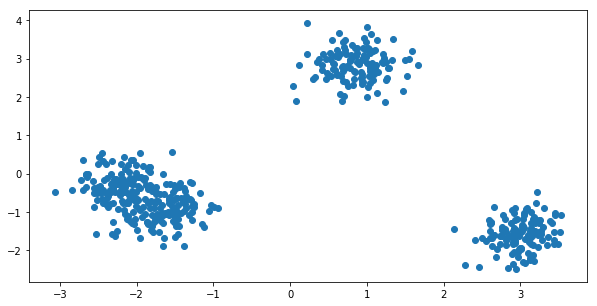

In [8]:
plt.scatter(prinDf.loc[:,"PC1"], prinDf.loc[:,"PC2"])

plt.show()

There seems to be three clusters when using PCA (2 dimensions), but one cluster (left corner) could possibly be separated into two different clusters.

### Exercise 2

#### Run K-means clustering on the data for different values of K (use the original 10-dimensional data as input to K-means, not the PCA projection). Select the number K for which the clustering has the maximal Silhouette Score. Color the scatter plot of the PCA projection so that members of each cluster are colored differently.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as score

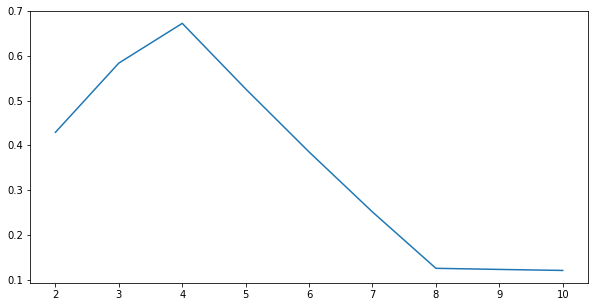

In [10]:
# Calculating different silhouette scores

scores = []

for i in range(2,11):
    cluster = KMeans(n_clusters=i, random_state=123)
    label = cluster.fit(data).labels_
    scores.append(score(data, label))

plt.plot(list(range(2,11)), scores)
plt.show()

The optimal number of clusters based on maximal Silhouette Score is 4.

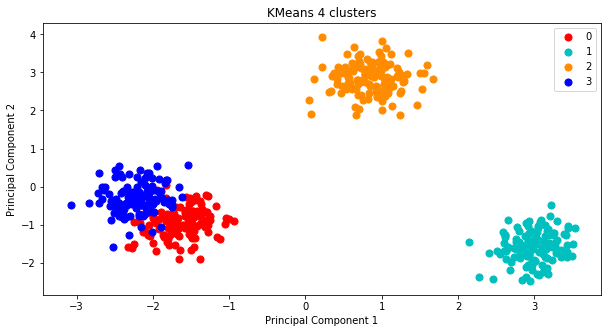

In [11]:
# Marking each cluster with different colour into earlier PCA scatterplot

model = KMeans(n_clusters=4, random_state=123).fit(data)
labels = model.labels_
prinDf['Label'] = labels

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans 4 clusters')
targets = [0,1,2,3]
colors = ['r', 'c', 'darkorange', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = prinDf['Label'] == target
    plt.scatter(prinDf.loc[indicesToKeep, 'PC1']
               , prinDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

#### Did you end up with the same clustering of the data as you did based on visual inspection of the PCA plot? If no, do you know which clustering captures the true structure of the data better?

Kmeans divides the cluster in left corner into two like anticipated earlier in exercise 1. The Silhouette Score is also higher which indicates that four clusters would capture the true structure better than three clusters.

### Exercise 3

#### Load the Iris data set used in Exercise 2. Visualize the data with scatter plot of 2-dimensional PCA projection, color each species separately (same picture as in Exercise 2). Remove the true species column, and pretend from now on that you do not know it.

In [12]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

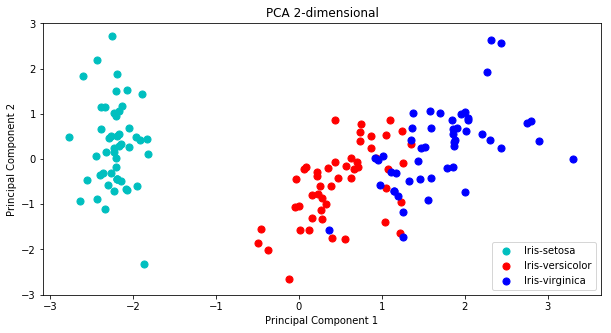

In [13]:
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
x = dataset.loc[:, features].values # separating out the features (consider as removing in future)
y = dataset.loc[:,['class']].values # separating out the target

x1 = pd.DataFrame(StandardScaler().fit_transform(x)) # standardizing the features

princomp2 = pca.fit_transform(x1) 
prinDf2 = pd.DataFrame(data = princomp2, columns = ['PC1', 'PC2'])

finalDf2 = pd.concat([prinDf2, dataset[['class']]], axis = 1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2-dimensional')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['c', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['class'] == target
    plt.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

#### Part 1: Assume that you are told in advance, that there are three different species you should try to find from the data. Cluster the original 4-dimensional Iris data into 3 clusters with K-means method. Create another PCA scatter plot, where you visualize these three clusters. How well does the clustering found by K-means agree with the true class labels?

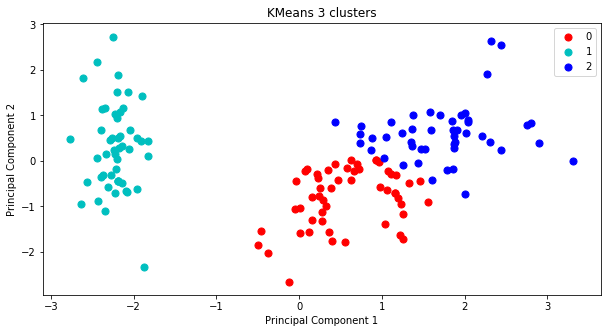

In [14]:
kmodel = KMeans(n_clusters=3, random_state=123).fit(x1)
klabels = kmodel.labels_
prinDf2['Label'] = klabels

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans 3 clusters')
targets = [0,1,2]
colors = ['r', 'c', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = prinDf2['Label'] == target
    plt.scatter(prinDf2.loc[indicesToKeep, 'PC1']
               , prinDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

Kmeans separates the clusters well but the line between red and blue (Versicolor and Virginica) is different: its more horizontal than vertical.

#### Part 2: Assume that you have no prior information about the number of clusters in the data. Select the number K for which the clustering of Iris has the maximal Silhouette Score. Visualize the K-means clustering for this value of K. How well does the clustering found by K-means agree with the true class labels?

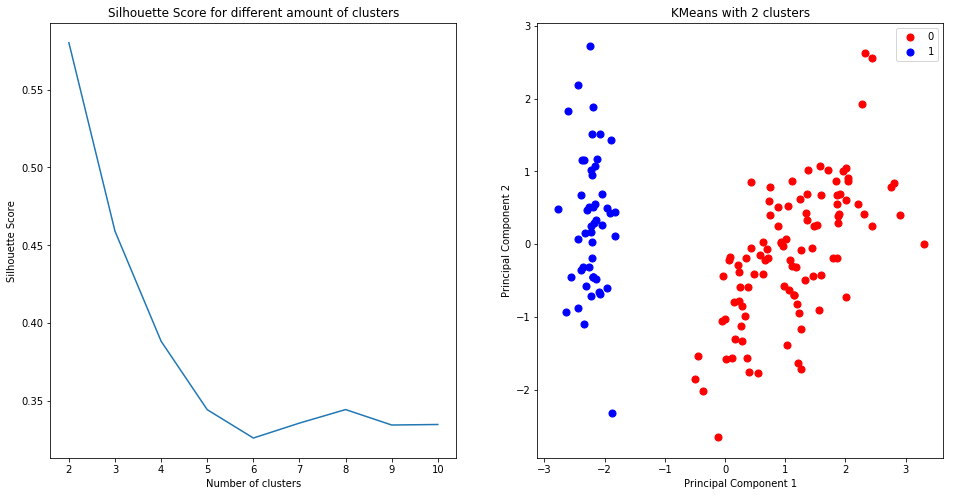

In [15]:
# Calculating different silhouette scores

kscores = []

for i in range(2,11):
    cluster = KMeans(n_clusters=i, random_state=123)
    label = cluster.fit(x1).labels_
    kscores.append(score(x1, label))

plt.figure(figsize=(16, 8))
    
plt.subplot(1,2,1)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different amount of clusters')
plt.plot(list(range(2,11)), kscores)

k2model = KMeans(n_clusters=2, random_state=123).fit(x1)
k2labels = k2model.labels_
prinDf2['Label2'] = k2labels

plt.subplot(1,2,2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans with 2 clusters')
targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = prinDf2['Label2'] == target
    plt.scatter(prinDf2.loc[indicesToKeep, 'PC1']
               , prinDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

The maximal Silhouette Score is achieved with 2 clusters which combines clusters 2 and 3 (Part 1). As we know, there're three different classes so clearly two clusters is not truthful to original data.

### Bonus

Data can be downloaded from here https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+(MFCCs)

In [16]:
frogs = pd.read_csv('Frogs_MFCCs.csv', header = 0, sep = ',')
frogs.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [17]:
frogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
MFCCs_ 1    7195 non-null float64
MFCCs_ 2    7195 non-null float64
MFCCs_ 3    7195 non-null float64
MFCCs_ 4    7195 non-null float64
MFCCs_ 5    7195 non-null float64
MFCCs_ 6    7195 non-null float64
MFCCs_ 7    7195 non-null float64
MFCCs_ 8    7195 non-null float64
MFCCs_ 9    7195 non-null float64
MFCCs_10    7195 non-null float64
MFCCs_11    7195 non-null float64
MFCCs_12    7195 non-null float64
MFCCs_13    7195 non-null float64
MFCCs_14    7195 non-null float64
MFCCs_15    7195 non-null float64
MFCCs_16    7195 non-null float64
MFCCs_17    7195 non-null float64
MFCCs_18    7195 non-null float64
MFCCs_19    7195 non-null float64
MFCCs_20    7195 non-null float64
MFCCs_21    7195 non-null float64
MFCCs_22    7195 non-null float64
Family      7195 non-null object
Genus       7195 non-null object
Species     7195 non-null object
RecordID    7195 non-null int64
dtypes: float6

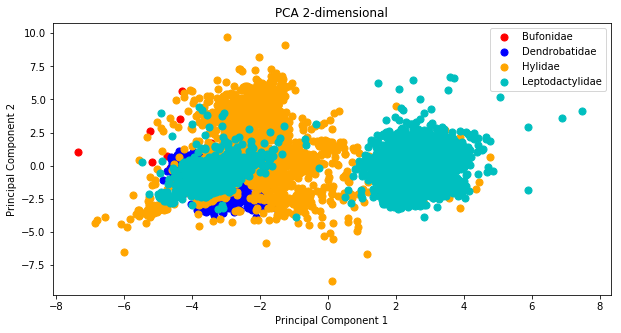

In [18]:
frogsX = frogs.drop(columns=['Family', 'Genus','Species', 'RecordID'])
frogsY = frogs[['Family']] # Family as a class we're interested in clustering based on other data

frogsXStand = StandardScaler().fit_transform(frogsX) # standardizing attributes

# PCA 2-dimensional

frogsPCA = pca.fit_transform(frogsXStand) 
frogsDf = pd.DataFrame(data = frogsPCA, columns = ['PC1', 'PC2'])

frogsPCADf = pd.concat([frogsDf, frogsY], axis = 1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2-dimensional')
targets = ['Bufonidae' , 'Dendrobatidae', 'Hylidae', 'Leptodactylidae']
colors = ['r', 'b', 'orange','c']
for target, color in zip(targets,colors):
    indicesToKeep = frogsPCADf['Family'] == target
    plt.scatter(frogsPCADf.loc[indicesToKeep, 'PC1']
               , frogsPCADf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

Adjusted Rand Index: 0.446
Silhouette Coefficient: 0.359


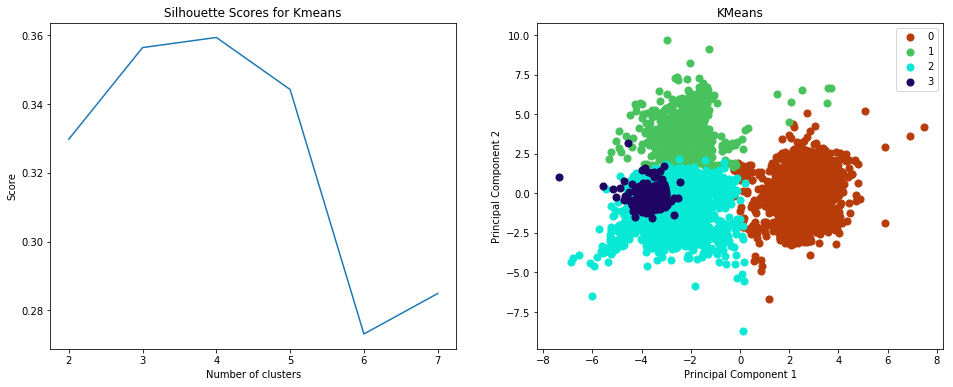

In [19]:
# KMeans

import random
import numpy as np
from sklearn.metrics import adjusted_rand_score as randscore

# Calculating different silhouette scores

kmeanscores = []

for i in range(2,8):
    cluster = KMeans(n_clusters=i, random_state=123)
    label = cluster.fit(frogsXStand).labels_
    kmeanscores.append(score(frogsXStand, label))

plt.figure(figsize=(16, 6))
    
plt.subplot(1,2,1)
plt.title('Silhouette Scores for Kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.plot(list(range(2,8)), kmeanscores)

# Plotting Kmeans

best = kmeanscores.index(np.max(kmeanscores)) + 2
kmeanmodel = KMeans(n_clusters=best, random_state=123).fit(frogsXStand)
kmeanlabels = kmeanmodel.labels_
frogsPCADf['LabelKMeans'] = kmeanlabels

print("Adjusted Rand Index: %0.3f"
      % randscore(frogsPCADf['Family'], kmeanlabels))
print("Silhouette Coefficient: %0.3f"
      % score(frogsXStand, kmeanlabels))

plt.subplot(1,2,2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans')

number_of_colors = len(np.unique(kmeanlabels))
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(number_of_colors)]
targets = np.unique(kmeanlabels)

for target, color in zip(targets,colors):
    indicesToKeep = frogsPCADf['LabelKMeans'] == target
    plt.scatter(frogsPCADf.loc[indicesToKeep, 'PC1']
               , frogsPCADf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    plt.legend(targets)

plt.show()

The major of the code below is copied from https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py and is modified to suit the matter at hand. I have commented the code in those parts which were new to me or weren't intuitive.

Adjusted Rand Index: 0.207
Silhouette Coefficient: 0.160


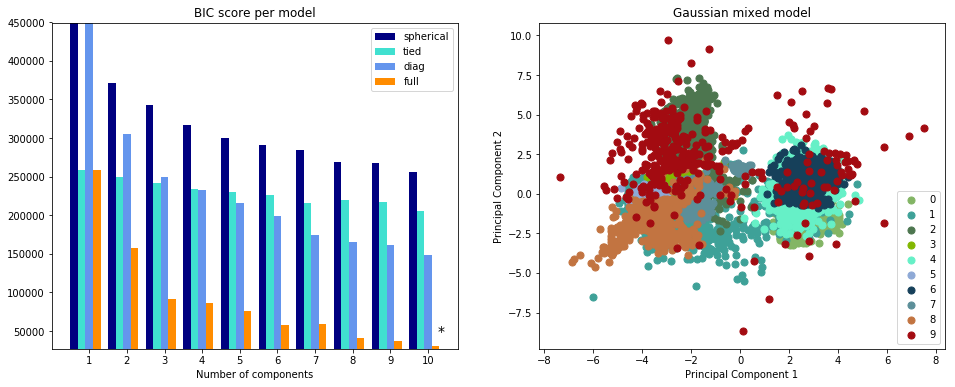

In [20]:
# Gaussian mixture model using Bayesian information criterion

import itertools
from sklearn import mixture
from scipy import linalg

# Initializing the first value for which to compare BIC
lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
# Fitting model using different types of covariance matrices
cv_types = ['spherical', 'tied', 'diag', 'full']
# Setting seed for replication (added into the code copied)

for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(frogsXStand)
        bic.append(gmm.bic(frogsXStand))
        # [-1] returns the most resent value (in R this deletes the value in a vector at the given index)
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
# Iterates the colors
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 6))
np.random.seed(1)
spl = plt.subplot(1,2,1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner

gaussianlabels = clf.predict(frogsXStand)
frogsPCADf['LabelGaussian'] = gaussianlabels

print("Adjusted Rand Index: %0.3f"
      % randscore(frogsPCADf['Family'], gaussianlabels))
print("Silhouette Coefficient: %0.3f"
      % score(frogsXStand, gaussianlabels))

splot = plt.subplot(1,2,2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gaussian mixed model')

targets = np.unique(gaussianlabels)
number_of_colors = len(np.unique(gaussianlabels))
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(number_of_colors)]

for target, color in zip(targets,colors):
    indicesToKeep = frogsPCADf['LabelGaussian'] == target
    plt.scatter(frogsPCADf.loc[indicesToKeep, 'PC1']
               , frogsPCADf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)

plt.show()

Same as earlier, the original code is from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py but is modifed to match the assignment.

Estimated number of clusters: 8
Estimated number of noise points: 1380
Adjusted Rand Index: 0.215
Silhouette Coefficient: 0.158


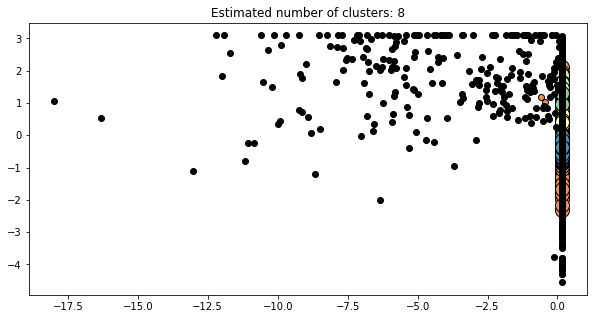

In [21]:
# DBSCAN

from sklearn.cluster import DBSCAN
import random

db = DBSCAN(eps=2, min_samples=50).fit(frogsXStand)
labels = db.labels_
# Array containing zeros as many as db.labels is long
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Adjusted Rand Index: %0.3f"
      % randscore(frogsPCADf['Family'], labels))
print("Silhouette Coefficient: %0.3f"
      % score(frogsXStand, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = frogsXStand[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = frogsXStand[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()

#### Conclusion

KMeans gives the best clustering for this data which is 4 clusters but it cannot detect (by definition) that one class is separated into two clusters (PCA) and thus the clusters doesn't quite match with the original labels. Gaussian Mixed Method suggests 8-10 clusters which is clearly a way lot more than in reality and DBSCAN gives 1-9 clusters depending on parameters used in modelling.

The plot for DBSCAN isn't particularly good but it may be that the method doesn't fit well into the data or I didn't consider or understand everything and didn't adjust the code well enough. Latter applies also to Gaussian Mixed Method.

#### Assume that you know in advance the real number of clusters in the data set. How good Rand index can you get for your clustering, does one method work clearly better on the data than another?

The best Rand index is 0.446 given by Kmeans with 4 clusters which also seems to be the best method overall.

#### Select the number of clusters automatically based on either the Silhouette Score, or some other selection criterion suitable for the methods you are using (different methods can use different criteria). Does the number of clusters automatically selected match the number of classes in the data?

The number of clusters match only for KMeans, GMM and DBSCAN are way off, though the "goodness of fit" for GMM between different cluster sizes doesn't vary much for sizes 3-5 and 6-10.

#### Are the clustering methods sensitive to initialization, do they give very different clusterings when initialized with different random seed numbers?

KMeans gives 3 or 4 clusters and the placing is quite similar so there's little variation. GMM gives 8-10 clusters and there's some variation of course but DBSCAN seems to be the most sensitive to initialization: the amount of clusters varies between 1 to at least 10.